In [2]:
# Import the required Libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the Data and pass the parameter as parse_dates=True, index_col='Date/Time'
weather_2012= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 3_Matplotlib Visualizing the Weather Dataset\file (6).csv")
weather_2012

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [4]:
weather_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           8784 non-null   object 
 1   Temp (C)            8784 non-null   float64
 2   Dew Point Temp (C)  8784 non-null   float64
 3   Rel Hum (%)         8784 non-null   int64  
 4   Wind Spd (km/h)     8784 non-null   int64  
 5   Visibility (km)     8784 non-null   float64
 6   Stn Press (kPa)     8784 non-null   float64
 7   Weather             8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
type(weather_2012['Date/Time'][0])

str

In [6]:
weather_2012['Date']= pd.to_datetime(weather_2012['Date/Time']).dt.date
weather_2012['Time']= pd.to_datetime(weather_2012['Date/Time']).dt.time
weather_2012

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Date,Time
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,00:00:00
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,01:00:00
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,02:00:00
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01,03:00:00
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,2012-12-31,19:00:00
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,2012-12-31,20:00:00
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,2012-12-31,21:00:00
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,2012-12-31,22:00:00


In [7]:
weather_2012.Date = pd.to_datetime(weather_2012.Date)

In [8]:
monthly_mean= weather_2012.groupby(weather_2012['Date'].dt.strftime('%B'))['Temp (C)'].describe()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_mean= monthly_mean.reindex(new_order, axis=0)
monthly_mean

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
January,744.0,-7.371505,6.382532,-23.3,-12.000,-7.05,-2.100,5.3
February,696.0,-4.225000,5.132305,-16.9,-7.925,-4.10,0.600,6.1
March,744.0,3.121237,7.808771,-16.2,-2.025,2.60,7.600,25.5
April,720.0,7.009306,5.031103,-3.0,3.775,6.30,8.900,27.8
May,744.0,16.237769,5.216031,4.6,12.400,16.05,19.700,31.2
June,720.0,20.134028,5.011927,9.5,16.275,19.60,23.925,33.0
July,744.0,22.790054,4.026849,12.4,20.200,22.90,25.600,33.0
August,744.0,22.279301,3.708003,10.5,19.900,22.20,24.700,32.8
September,720.0,16.484444,5.285297,4.9,12.800,16.10,20.400,28.4


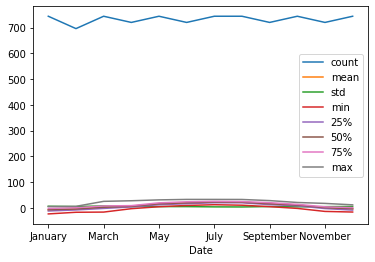

In [9]:
#With the help of a line chart, visualize the monthly trend in the temperature.
monthly_mean.plot()

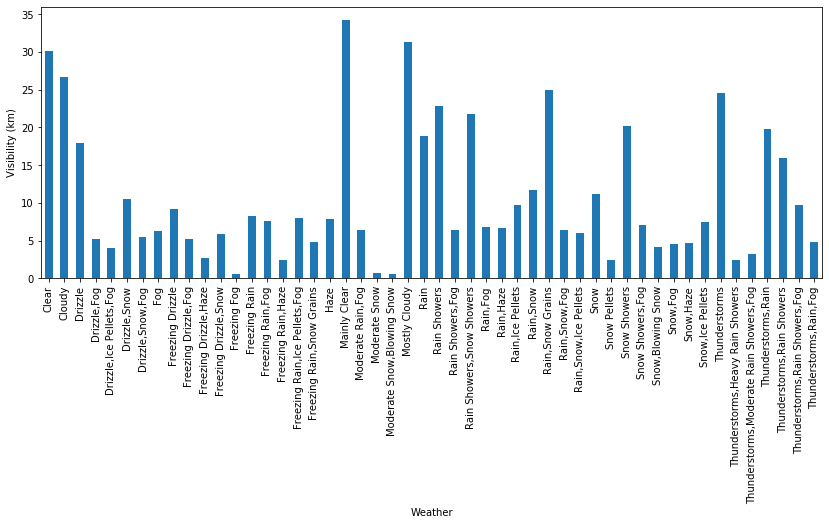

In [10]:
#Mean Visibility (km) during different Weathers
weather_2012.groupby('Weather')['Visibility (km)'].mean().plot(kind='bar', figsize=(14,5))
plt.ylabel('Visibility (km)')
plt.show()

In [11]:
def line_chart(df,period,col):
    """ A line chart that visualizes the readings in the months
    
    This function accepts the dataframe df ,period(day/month/year) and col(feature), which plots the aggregated value of the feature based on the periods. Ensure the period labels are properly named.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    period - Period of time over which you want to aggregate the data
    col - Feature of the dataframe
    
    """
    
    







# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(df):
    """ Univariate analysis of categorical columns
    
    This function accepts the dataframe df which analyzes all the variable in the data and performs the univariate analysis using bar plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    
    """

# Function to plot continous plots
def plot_cont(df,plt_typ):
    """ Univariate analysis of Numerical columns
    
    This function accepts the dataframe df, plt_type(boxplot/distplot) which analyzes all the variable in the data and performs the univariate analysis using boxplot or distplot plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    plt_type - type of plot through which you want to visualize the data
    
    """
    
    







# Function to plot grouped values based on the feature
def group_values(df,col1,agg1,col2):
    """ Agrregate values by grouping
    
    This function accepts a dataframe, 2 column(feature) and aggregated function(agg1) which groupby the dataframe based on the column and plots the bar plot.
   
    Keyword arguments:
    df - Pandas dataframe which has the data.
    col1 - Feature of the dataframe on which values will be aggregated.
    agg1 - Dictionary of aggregate functions with feature as the key and func as the value
    col2 - Feature of the dataframe to be plot against grouped data.
    
    Returns:
    grouping - Dataframe with all columns on which it is grouped on.
    """
    
    




# Read the Data and pass the parameter as parse_dates=True, index_col='Date/Time'



# Lets try to generate a line chart that visualizes the temperature readings in the months.
# Call the function line_chart() with the appropriate parameters.



# Now let's perform the univariate analysis of categorical features.
# Call the "function plot_categorical_columns()" with appropriate parameters.



# Let's plot the Univariate analysis of Numerical columns.
# Call the function "plot_cont()" with the appropriate parameters to plot distplot



# Call the function "plot_cont()" with the appropriate parameters to plot boxplot


# Groupby the data by Weather and plot the graph of the mean visibility during different weathers. Call the function group_values to plot the graph.
# Feel free to try on diffrent features and aggregated functions like max, min.
